#INF2178 Midterm Submission

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from scipy.stats import ttest_ind #Used for T-test
import statsmodels.api as sm #Used for ANOVA + bibary and categorical variables
from statsmodels.formula.api import ols #Used for ANOVA + bibary and categorical variables
!pip install bioinfokit
from bioinfokit.analys import stat
df2 = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

#Data Cleaning 

In [2]:
#Convert Age into categorical numbers
df2['Age_group__at_arrest_'] = df2['Age_group__at_arrest_'].replace({'Aged 25 to 34 years': 30, 
                                     'Aged 35 to 44 years': 40,
                                     'Aged 18 to 24 years': 21,
                                     'Aged 45 to 54 years': 50,
                                     'Aged 55 to 64 years': 60,
                                     'Aged 65 and older': 65,
                                     'Aged 65 years and older': 65,
                                     'Aged 17 years and younger': 17,
                                     'Aged 17 years and under': 17,})
df2

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,40.0,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,40.0,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,40.0,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,30.0,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,30.0,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,30.0,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,40.0,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,50.0,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,17.0,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [ ]:
# rename the Age attribute
df_new = df2.rename(columns={'Age_group__at_arrest_': 'Age'})
df_new

In [ ]:
df3 = df_new.groupby(['Arrest_Year', 'PersonID', 'Sex', 'Perceived_Race']).agg({'StripSearch':'sum', 'Booked':'sum', 'Age':'max'})
df3.head(25)

In [5]:
# drop 'Sex' index and move it to a column
df3 = df3.reset_index(level=['Sex','Perceived_Race'])
df3

Sex        Perceived_Race  StripSearch  Booked   Age
Arrest_Year PersonID                                                     
2020        300000     M  East/Southeast Asian            0       0  40.0
            300001     F                 White            0       1  17.0
            300002     M                 White            0       0  40.0
            300003     M                 White            1       3  30.0
            300004     M                 Black            0       1  30.0
...                   ..                   ...          ...     ...   ...
2021        337332     M     Unknown or Legacy            0       1  40.0
            337334     F                Latino            0       0  17.0
            337339     M                 White            0       1  40.0
            337342     M                 White            0       0  17.0
            337345     M                 Black            0       0  65.0

[45281 rows x 5 columns]

#Data Description/Data Visualization 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'East/Southeast Asian'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'South Asian'),
  Text(4, 0, 'Middle-Eastern'),
  Text(5, 0, 'Unknown or Legacy'),
  Text(6, 0, 'Latino'),
  Text(7, 0, 'Indigenous')])

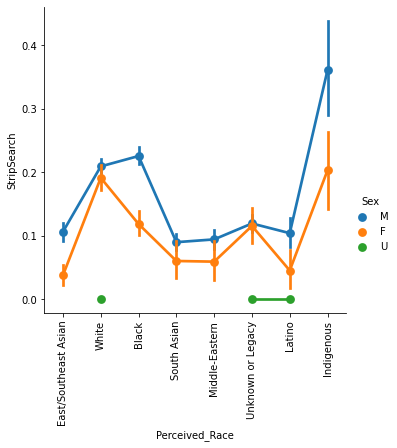

In [27]:
# Create interaction plot
sns.catplot(x='Perceived_Race', y='StripSearch', hue='Sex', kind='point', data=df3)
plt.xticks(rotation=90)

Text(0.5, 0.98, 'Strip searches between races and sex woth regrad to arrested people')

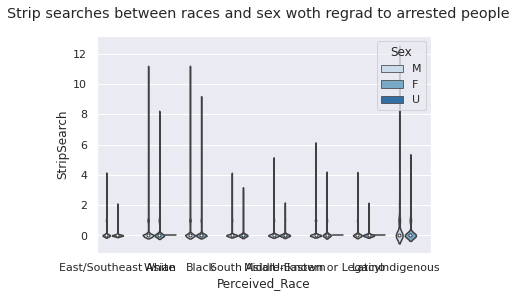

In [28]:
#Visualization
#Box Plot
sns.set(style="darkgrid")
fig_Box = sns.violinplot(data=df3, x="Perceived_Race", y="StripSearch", hue="Sex", palette="Blues")
fig_Box.figure.suptitle("Strip searches between races and sex woth regrad to arrested people")


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'East/Southeast Asian'),
  Text(2, 0, 'Indigenous'),
  Text(3, 0, 'Latino'),
  Text(4, 0, 'Middle-Eastern'),
  Text(5, 0, 'South Asian'),
  Text(6, 0, 'Unknown or Legacy'),
  Text(7, 0, 'White')])

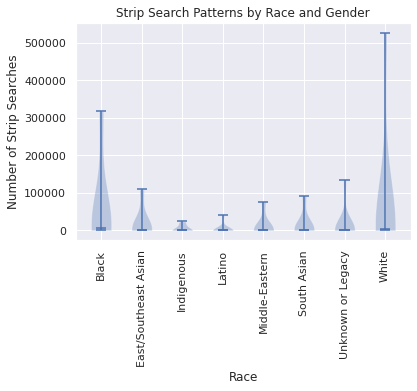

In [29]:
# create violin plot
# Group the data by race and gender
df3_1 = df3.groupby(['Perceived_Race', 'Sex']).sum()
# Reshape the data to be in the correct format for plotting
df3_2 = df3_1.unstack(level=-1)
# Create a violin plot
fig, ax = plt.subplots()
ax.violinplot(dataset=[df3_2.loc[race].dropna() for race in df3_2.index],
              positions=range(len(df3_2)),
              showmeans=False,
              showmedians=True)

# Add labels and title
ax.set_xticks(range(len(df3_2)))
ax.set_xticklabels(df3_2.index)
ax.set_xlabel('Race')
ax.set_ylabel('Number of Strip Searches')
ax.set_title('Strip Search Patterns by Race and Gender')
# set the x-axis label rotation angle to 45 degrees
plt.xticks(rotation=90)


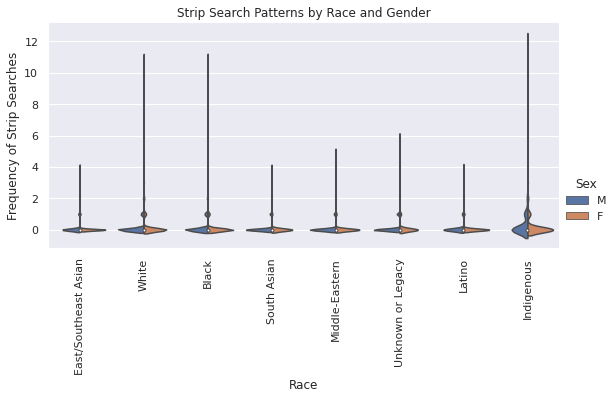

In [30]:
# Create violin plot
df3 = df3[df3['Sex'] != 'U']
g = sns.catplot(x="Perceived_Race", y="StripSearch", hue="Sex", kind="violin", split=True, data=df3, height=4, aspect=2)
# Set labels and title
g.set(xlabel="Race", ylabel="Frequency of Strip Searches", title="Strip Search Patterns by Race and Gender")
# set the x-axis label rotation angle to 45 degrees
plt.xticks(rotation=90)
# Show plot
plt.show()

In [31]:
df3 = df3.dropna()
df3 = df3[df3['Sex'] != 'U']
fig_hist = px.histogram(data_frame = df3, x = 'Perceived_Race', y = 'StripSearch', facet_row= 'Sex', facet_col='Age')
fig_hist

Text(0.5, 1.0, 'Distribution of Sex, Age, and Races')

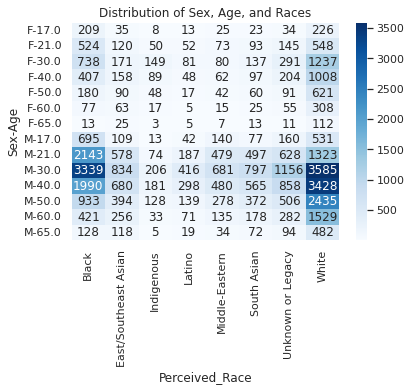

In [32]:
pivot_table = df3.pivot_table(index=['Sex', 'Age'], columns='Perceived_Race', values='StripSearch', aggfunc='count')
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')
plt.title('Distribution of Sex, Age, and Races')

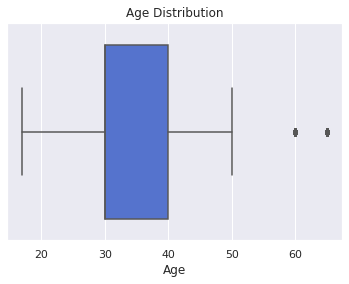

In [33]:
# plt.figure(figsize=(8,8))
sns.boxplot(x=df3["Age"], color='royalblue')
plt.title("Age Distribution")
plt.xlabel("Age");


In [34]:
df3['Age'].value_counts()

30.0    13898
40.0    10553
21.0     7514
50.0     6334
60.0     3470
17.0     2340
65.0     1141
Name: Age, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



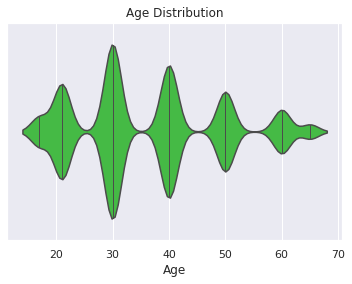

In [35]:
#plt.figure(figsize=(20,5))
sns.violinplot(df3['Age'], color='limegreen', inner='stick');
plt.title('Age Distribution')
plt.xlabel('Age');


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Unknown or Legacy'),
  Text(3, 0, 'East/Southeast Asian'),
  Text(4, 0, 'South Asian'),
  Text(5, 0, 'Middle-Eastern'),
  Text(6, 0, 'Latino'),
  Text(7, 0, 'Indigenous')])

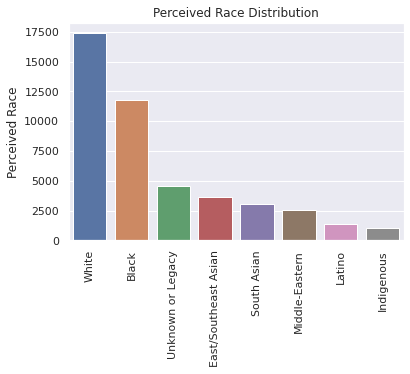

In [36]:
x=df3.Perceived_Race.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('Perceived Race')
plt.title("Perceived Race Distribution")
plt.xticks(rotation=90)

In [37]:
pd.crosstab(df3.Sex,df3.StripSearch,margins=True).style.background_gradient(cmap='summer_r')

StripSearch,0,1,2,3,4,5,6,7,8,9,10,11,12,All
Sex,,,,,,,,,,,,,,
F,8121,703,133,50,12,7,7,2,2,1,0,0,0,9038
M,31558,3585,680,201,89,45,24,15,5,5,2,2,1,36212
All,39679,4288,813,251,101,52,31,17,7,6,2,2,1,45250


In [38]:
pd.crosstab(df3.Perceived_Race,df3.StripSearch,margins=True).style.background_gradient(cmap='summer_r')

StripSearch,0,1,2,3,4,5,6,7,8,9,10,11,12,All
Perceived_Race,,,,,,,,,,,,,,
Black,10056,1332,269,80,26,15,7,2,4,4,1,1,0,11797
East/Southeast Asian,3348,239,34,6,4,0,0,0,0,0,0,0,0,3631
Indigenous,808,144,29,10,2,7,2,1,0,0,0,0,1,1004
Latino,1286,90,11,4,2,0,0,0,0,0,0,0,0,1393
Middle-Eastern,2346,155,21,6,2,1,0,0,0,0,0,0,0,2531
South Asian,2790,186,21,7,2,0,0,0,0,0,0,0,0,3006
Unknown or Legacy,4049,412,45,5,2,1,1,0,0,0,0,0,0,4515
White,14996,1730,383,133,61,28,21,14,3,2,1,1,0,17373
All,39679,4288,813,251,101,52,31,17,7,6,2,2,1,45250


In [39]:
pd.crosstab([df3.Perceived_Race,df3.Sex],df3.StripSearch,margins=True).style.background_gradient(cmap='summer_r')

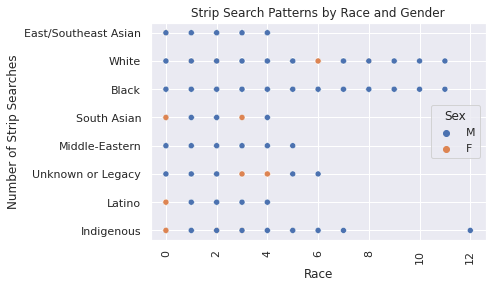

In [40]:
#Scatter plot
sns.scatterplot(data=df3, x='StripSearch', y='Perceived_Race', hue='Sex')
plt.xlabel('Race')
plt.ylabel('Number of Strip Searches')
plt.title('Strip Search Patterns by Race and Gender')
plt.xticks(rotation=90)
plt.show()

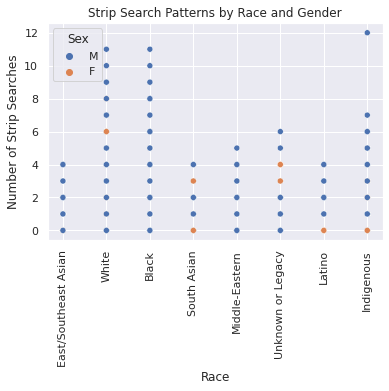

In [41]:
#Scatter plot
sns.scatterplot(data=df3, x='Perceived_Race', y='StripSearch', hue='Sex')
plt.xlabel('Race')
plt.ylabel('Number of Strip Searches')
plt.title('Strip Search Patterns by Race and Gender')
plt.xticks(rotation=90)
plt.show()

#T-test

T-Test: Is there a significant difference in the mean age at the time of arrest between males and females?




In [51]:
group1=df3[df3['Sex']=='M']['StripSearch']
group2=df3[df3['Sex']=='F']['StripSearch']

In [52]:
group1_mean = np.mean(group1)
group1_sd = np.std(group1)
group1_size = len(group1)
group2_mean = np.mean(group2)
group2_sd = np.std(group2)
group2_size = len(group2)

In [53]:
t_statistic, p_value = ttest_ind(group1, group2)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 1: Mean = {}, SD = {}, Size = {}'.format(group1_mean, group1_sd, group1_size))
print('Group 2: Mean = {}, SD = {}, Size = {}'.format(group2_mean, group2_sd, group2_size))

T-statistic: 5.646961662305548
P-value: 1.6428501765606238e-08
Group 1: Mean = 0.1799679664199713, SD = 0.5851769241467732, Size = 36212
Group 2: Mean = 0.14195618499668067, SD = 0.5184011855546553, Size = 9038


T-Test: Is there a significant difference in the mean value of number of strip search between White community and black community?




In [54]:
group3=df3[df3['Perceived_Race']=='White']['StripSearch']
group4=df3[df3['Perceived_Race']=='Black']['StripSearch']

In [55]:
group3_mean = np.mean(group3)
group3_sd = np.std(group3)
group3_size = len(group3)
group4_mean = np.mean(group4)
group4_sd = np.std(group4)
group4_size = len(group4)

In [56]:
t_statistic, p_value = ttest_ind(group3, group4)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 3: Mean = {}, SD = {}, Size = {}'.format(group3_mean, group3_sd, group3_size))
print('Group 4: Mean = {}, SD = {}, Size = {}'.format(group4_mean, group4_sd, group4_size))

T-statistic: -0.1389342439602324
P-value: 0.8895030697726247
Group 3: Mean = 0.2052610372416969, SD = 0.6535302404917567, Size = 17373
Group 4: Mean = 0.20632364160379757, SD = 0.6222546387895843, Size = 11797


T-Test: Is there a significant difference in the mean value of number of strip search between White community and Indigenous community?




In [57]:
group5=df3[df3['Perceived_Race']=='White']['StripSearch']
group6=df3[df3['Perceived_Race']=='Indigenous']['StripSearch']

In [58]:
group5_mean = np.mean(group5)
group5_sd = np.std(group5)
group5_size = len(group5)
group6_mean = np.mean(group6)
group6_sd = np.std(group6)
group6_size = len(group6)

In [59]:
t_statistic, p_value = ttest_ind(group5, group6)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 5: Mean = {}, SD = {}, Size = {}'.format(group5_mean, group5_sd, group5_size))
print('Group 6: Mean = {}, SD = {}, Size = {}'.format(group6_mean, group6_sd, group6_size))

T-statistic: -4.604093166972961
P-value: 4.170416575154248e-06
Group 5: Mean = 0.2052610372416969, SD = 0.6535302404917567, Size = 17373
Group 6: Mean = 0.3047808764940239, SD = 0.8519587530656213, Size = 1004


T-Test: Is there a significant difference in the mean value of number of strip search between Black community and South Asian community?



In [60]:
group9=df3[df3['Perceived_Race']=='Black']['StripSearch']
group10=df3[df3['Perceived_Race']=='South Asian']['StripSearch']

In [61]:
group9_mean = np.mean(group9)
group9_sd = np.std(group9)
group9_size = len(group9)
group10_mean = np.mean(group10)
group10_sd = np.std(group10)
group10_size = len(group10)

In [62]:
t_statistic, p_value = ttest_ind(group9, group10)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 9: Mean = {}, SD = {}, Size = {}'.format(group9_mean, group9_sd, group9_size))
print('Group 10: Mean = {}, SD = {}, Size = {}'.format(group10_mean, group10_sd, group10_size))

T-statistic: 10.266932191649351
P-value: 1.2013262956248283e-24
Group 9: Mean = 0.20632364160379757, SD = 0.6222546387895843, Size = 11797
Group 10: Mean = 0.0854956753160346, SD = 0.33780809423526936, Size = 3006


#One Way ANOVA

One way ANOVA: to test whether this is a significant difference in the mean strip searches between races of arrested people.


*   Dependent Variables: StripSearch
*   Independent Variables: Race




In [24]:
# create and fit the ANOVA model
OWA = ols('StripSearch ~ C(Perceived_Race)', data=df3).fit()
# print the ANOVA table
table_OWA = sm.stats.anova_lm(OWA, typ=2)
print(table_OWA)

                         sum_sq       df          F        PR(>F)
C(Perceived_Race)    133.316392      7.0  58.627114  3.474490e-84
Residual           14707.073706  45273.0        NaN           NaN


In [42]:
import statsmodels.stats.multicomp as mc
mc_model = mc.MultiComparison(df3['StripSearch'], df3['Perceived_Race'])
tukey_result = mc_model.tukeyhsd()
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1124  0.001 -0.1452 -0.0796   True
               Black           Indigenous   0.0985  0.001  0.0416  0.1553   True
               Black               Latino  -0.1116  0.001 -0.1605 -0.0626   True
               Black       Middle-Eastern  -0.1162  0.001 -0.1541 -0.0784   True
               Black          South Asian  -0.1208  0.001 -0.1561 -0.0855   True
               Black    Unknown or Legacy  -0.0876  0.001 -0.1178 -0.0574   True
               Black                White  -0.0011    0.9 -0.0217  0.0196  False
East/Southeast Asian           Indigenous   0.2109  0.001  0.1492  0.2725   True
East/Southeast Asian               Latino   0.0008    0.9 -0.0536  0.0553  False
East/Southeast Asian       M

#Two Way ANOVA

Two way ANOVA: to test whether this is a significant difference in the means strip searches between races and sex woth regrad to arrested people.

*   Dependent Variables: StripSearch
*   Independent Variables: Race, Sex

In [25]:
# Define the ANOVA model with two independent variables
TWA = ols('StripSearch ~ Perceived_Race + Sex + Perceived_Race:Sex', data=df3).fit()
# Print the ANOVA table
table_TWA = sm.stats.anova_lm(TWA, typ=2)
print(table_TWA)

                          sum_sq       df          F        PR(>F)
Perceived_Race        171.993832      7.0  75.777927  6.914212e-49
Sex                    17.464832      2.0  26.931610  2.045053e-12
Perceived_Race:Sex     19.139760     14.0   4.216347  7.058595e-06
Residual            14675.937389  45262.0        NaN           NaN


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [26]:
model = ols('StripSearch ~ C(Sex) + C(Perceived_Race)', data=df3).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),17.605788,2.0,27.129356,1.678516e-12
C(Perceived_Race),140.165393,7.0,61.710175,8.966561e-89
Residual,14689.467918,45271.0,NaN,NaN


In [48]:
res = stat()
res.tukey_hsd(df=df3, res_var='StripSearch', xfac_var='Sex', anova_model='StripSearch ~ C(Sex)*C(Perceived_Race)+ C(Sex):C(Perceived_Race)')
res.tukey_summary

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,M,F,0.038012,0.024885,0.051139,8.026562,0.001


In [49]:
res = stat()
res.tukey_hsd(df=df3, res_var='StripSearch', xfac_var=['Sex','Perceived_Race'], anova_model='StripSearch ~ C(Sex)*C(Perceived_Race)+ C(Sex):C(Perceived_Race)')
res.tukey_summary

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:368: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(M, East/Southeast Asian)","(M, White)",0.102986,0.063376,0.142596,12.598723,0.001000
1,"(M, East/Southeast Asian)","(M, Black)",0.119393,0.078435,0.160352,14.125031,0.001000
2,"(M, East/Southeast Asian)","(M, South Asian)",0.016519,-0.036129,0.069167,1.520395,0.900000
3,"(M, East/Southeast Asian)","(M, Middle-Eastern)",0.012136,-0.042574,0.066846,1.074880,0.900000
4,"(M, East/Southeast Asian)","(M, Unknown or Legacy)",0.013002,-0.035130,0.061135,1.308980,0.900000
...,...,...,...,...,...,...,...
115,"(F, Middle-Eastern)","(F, Latino)",0.013962,-0.158559,0.186482,0.392147,0.900000
116,"(F, Middle-Eastern)","(F, Indigenous)",0.144086,-0.007547,0.295720,4.604471,0.084779
117,"(F, Unknown or Legacy)","(F, Latino)",0.070275,-0.077434,0.217983,2.305395,0.900000
118,"(F, Unknown or Legacy)","(F, Indigenous)",0.087773,-0.034894,0.210440,3.467269,0.507112


In [50]:
res = stat()
res.tukey_hsd(df=df3, res_var='StripSearch', xfac_var='Perceived_Race', anova_model='StripSearch ~ C(Sex)*C(Perceived_Race)+ C(Sex):C(Perceived_Race)')
res.tukey_summary

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,East/Southeast Asian,White,0.111348,0.079845,0.142850,15.150894,0.001000
1,East/Southeast Asian,Black,0.112410,0.079646,0.145174,14.706446,0.001000
2,East/Southeast Asian,South Asian,0.008418,-0.034154,0.050990,0.847580,0.900000
3,East/Southeast Asian,Middle-Eastern,0.003831,-0.040873,0.048534,0.367297,0.900000
4,East/Southeast Asian,Unknown or Legacy,0.024802,-0.013682,0.063285,2.762565,0.511575
5,East/Southeast Asian,Latino,0.000846,-0.053564,0.055256,0.066648,0.900000
6,East/Southeast Asian,Indigenous,0.210867,0.149309,0.272426,14.683266,0.001000
7,White,Black,0.001063,-0.019534,0.021659,0.221149,0.900000
8,White,South Asian,0.119765,0.085662,0.153869,15.053237,0.001000
9,White,Middle-Eastern,0.115178,0.078447,0.151909,13.441301,0.001000
